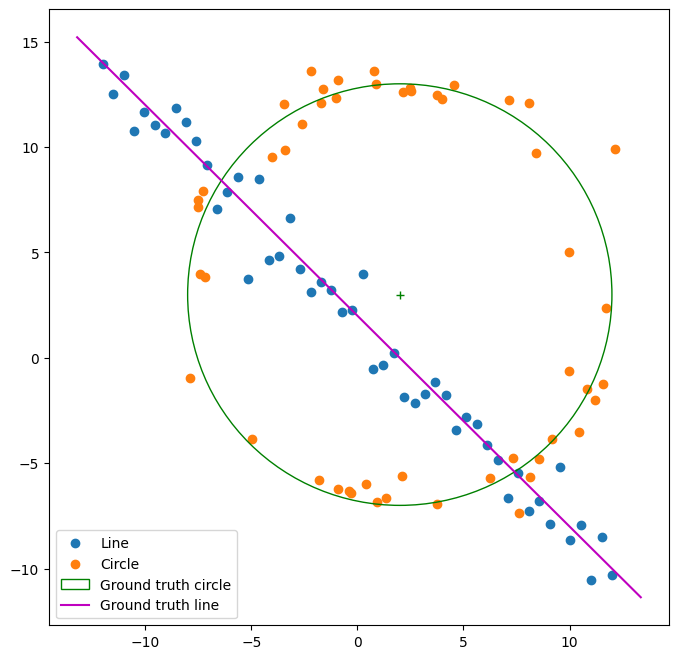

In [335]:
import numpy as np
from scipy . optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
#import tikzplotlib
# np . random. seed ( 0 )
N = 100
half_n = N//2
r = 10
x0_gt , y0_gt = 2,3 # Center
s = r/16
t = np.random.uniform(0,2*np.pi,half_n)
n = s*np.random.randn(half_n)
x,y = x0_gt+(r+n)*np.cos(t),y0_gt+(r+n)*np.sin(t)
X_circ=np.hstack((x.reshape(half_n,1),y.reshape(half_n,1)))
s = 1.
m, b = -1, 2
x = np.linspace(-12,12,half_n)
y = m*x+b+s*np.random.randn(half_n)
X_line =np.hstack((x.reshape(half_n,1),y.reshape(half_n,1)))
X = np.vstack((X_circ,X_line))
fig,ax =plt.subplots(1,1,figsize=(8,8))
ax.scatter(X_line[:,0],X_line[:,1],label='Line')
ax.scatter(X_circ[:,0],X_circ[:,1],label='Circle')
circle_gt = plt.Circle((x0_gt,y0_gt),r,color='g',fill =False,label= 'Ground truth circle')
ax.add_patch(circle_gt)
ax.plot((x0_gt),(y0_gt),'+',color='g')
x_min,x_max = ax.get_xlim()
x_ = np.array([x_min,x_max])
y_ = m*x_ + b
plt.plot(x_,y_,color='m',label='Ground truth line')
plt.legend()
#print(np.random.choice(X_line, size=3, replace=False))

In [336]:
a1=[]
for i in range(len(X_line)):
    a1.append(i)

In [352]:
import numpy as np

#function to ransac line fitting 
def ransac_line_fitting(X,x1, distance_threshold, iterations):
    # X is the array which consists the points for the line fitting
    #x1 is the array of index of the sample points
    best_model = None
    best_consensus = 0
    for i in range(iterations):
        # Randomly sample index of points from the data set.
        index = np.random.choice(x1, size=5, replace=False)
        sampled_points=[]   #array to store the sampled_points
        for j in range(len(index)):
            sampled_points.append(X[index[j]])
        # Fit a line to the  sampled points.
        x=[]
        y=[]
        for k in range(len(index)):
            x.append(sampled_points[k][0])
            y.append(sampled_points[k][1])      
        z = np.polyfit(x,y, 1)
        #Normalizing the fitting line
        norm1 = np.sqrt(z[0]**2 + 1**2)
        a=z[0]/norm1
        b=-1/norm1
        d=z[1]/norm1
        # Calculate the distance of each point in the data set to the fitted line.
        distances = np.sqrt((X[:,0] * a + X[:,1] * b + d)**2 / (a**2 + b**2))
        # Count the number of points in the data set that are within the distance threshold from the fitted line.
        consensus = np.sum(distances < distance_threshold)
        if consensus > best_consensus:
            best_model = [a, b, d]
            best_consensus = consensus
    return best_model, best_consensus

In [356]:
#function to ransac curve fitting 
def ransac_circle_fitting(X,x1, distance_threshold, iterations):
    
    best_model_c = None
    best_consensus_c = 0

    for i in range(iterations):
        # Randomly sample  points from the data set of Circle fitting.
        index = np.random.choice(x1, size=5, replace=False)
        sampled_points_c=[]   #array to store the sampled_points
        for j in range(len(index)):
            sampled_points_c.append(X[index[j]])
        x2=[]
        y1=[]
        for k in range(len(index)):
            x2.append(sampled_points_c[k][0])
            y1.append(sampled_points_c[k][1]) 
        # Fit a circle to the three sampled points.
        x= fit_circle(x2,y1)[0]
        y=fit_circle(x2,y1)[1]
        r=fit_circle(x2,y1)[2]

        # Calculate the distance of each point in the data set to the fitted circle.
        distances_c = np.sqrt((X[:, 0] - x)**2 + (X[:, 1] - y)**2) - r

        # Count the number of points in the data set that are within the distance threshold of the fitted circle.
        consensus_c = np.sum(distances_c < distance_threshold)

        # If the number of points in the consensus is greater than the consensus threshold, then the fitted circle is a good model for the data.
        if consensus_c > best_consensus:
            best_model_c = [x, y, r]
            best_consensus_c = consensus_c

    return best_model_c, best_consensus_c

In [357]:
#function to curve fitting
def fit_circle(X,Y):
  
  # Calculate the mean of the x and y coordinates.
  x_mean = sum(X)/len(X)
  y_mean = sum(Y)/len(Y)

  # Calculate the squared distances from each point to the mean.
  r_squared = (X - x_mean)**2 + (Y - y_mean)**2

  # Find the point with the smallest squared distance to the mean.
  min_index = np.argmin(r_squared)

  # Calculate the radius of the circle.
  r = np.sqrt(np.mean(r_squared[min_index:]))

  # Return the center and radius of the fitted circle.
  return x_mean, y_mean, r

In [377]:
# Set the distance threshold and consensus threshold.
distance_threshold = 0.1
num_iterations=10
# Run the RANSAC algorithm to estimate the line.
best_model, best_consensus = ransac_line_fitting(X_line,a1, distance_threshold, num_iterations)

#remnant = x - best_model[0] * X_line[:, 0] - best_model[] *1 X_line[:, 1] - best_model[2]
best_model_c, best_consensus_c = ransac_circle_fitting(X_circ,a1, distance_threshold, num_iterations)

# Print the estimated circle parameters and the number of inliers.
print('Estimated line parameters:', best_model)
print('Number of inliers:', best_consensus)
# Print the estimated line parameters and the number of inliers.
print('Estimated circle parameters:', best_model_c)
print('Number of inliers:', best_consensus_c)

Estimated line parameters: [-0.7123815305438959, -0.7017923873482359, 1.0875049285795562]
Number of inliers: 7
Estimated circle parameters: [1.4239180739876218, 3.499327959040606, 9.897999127110591]
Number of inliers: 27


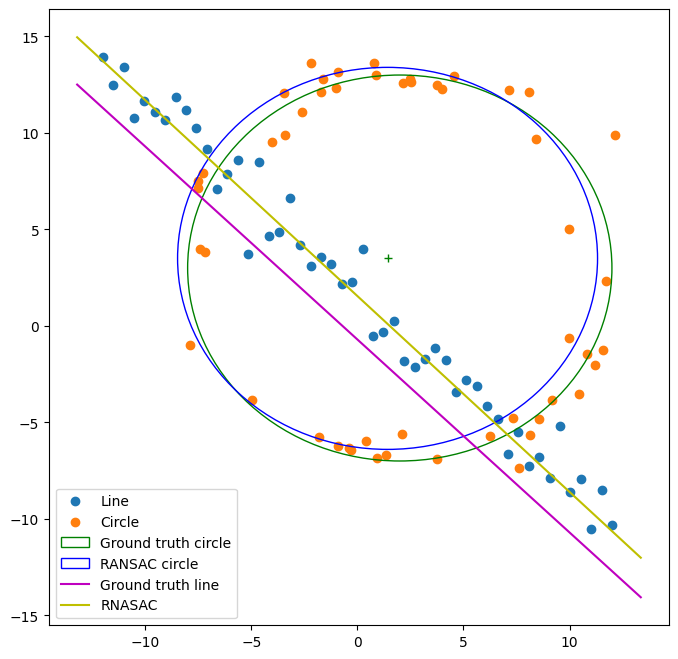

In [380]:
a=best_model[0]
b=best_model[1]
d=best_model[2]
fig,ax =plt.subplots(1,1,figsize=(8,8))
ax.scatter(X_line[:,0],X_line[:,1],label='Line')
ax.scatter(X_circ[:,0],X_circ[:,1],label='Circle')
circle_gt = plt.Circle((x0_gt,y0_gt),r,color='g',fill =False,label= 'Ground truth circle')
ax.add_patch(circle_gt)
circle_gt1 = plt.Circle((best_model_c[0],best_model_c[1]),best_model_c[2],color='b',fill =False,label= 'RANSAC circle')
ax.add_patch(circle_gt1)
circle_gt1 = plt.Circle((best_model_c[0],best_model_c[1]),best_model_c[2],color='b',fill =False,label= 'RANSAC circle')
ax.plot((best_model_c[0]),(best_model_c[1]),'+',color='g')

x_min,x_max = ax.get_xlim()
x_ = np.array([x_min,x_max])
y_ = m*x_ + b
y1=(a*x_+d)/(-b)
plt.plot(x_,y_,color='m',label='Ground truth line')
plt.plot(x_,y1,color='y',label='RNASAC')
plt.legend()